# LambdaMart

## Introduction

Lambdamart is a learning to rank algorithm (LTR), which falls in the listwise/pairwise bucket

The goal is - given a ranking problem, lambda mart indirectly optimizes for the ranking metric of interest directly, such as nDCG, or even precision, instead of optimizing for a particular row.


Since nDCG is not a differentiable metric, lambda rank offers a bound on this, which is differentiable

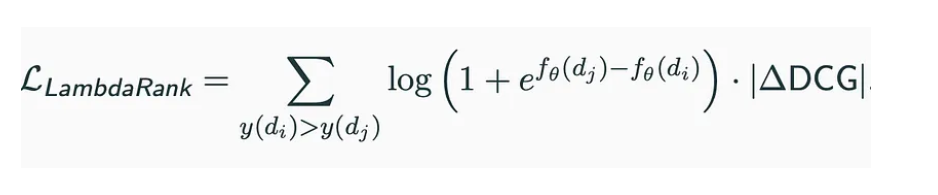


## Details and intuition

Assume we have this dataset which we saw earlier 

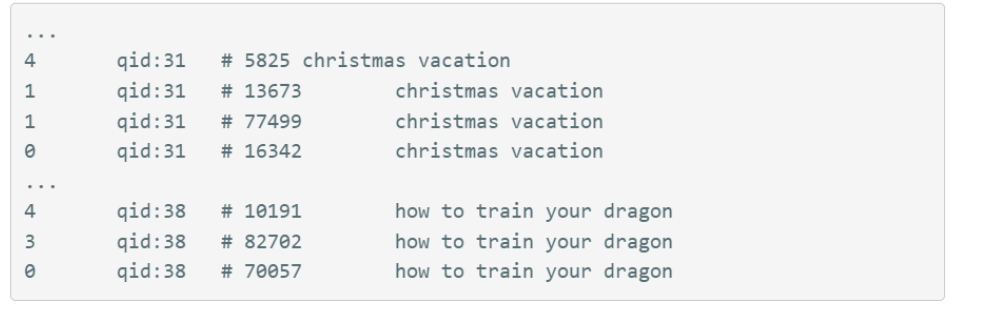

Where column 1 is a human labeled relevance ranking (4 being the highest, 0 being the lowest), column 2 is the ID of the query given by the user , column 4 is the text of the query given by the user, column 3 is the ID of the document (in this case a movie name fetched)

So , for example, the user gave a query  with query ID 31, christmas vacation, and that gave 4 hits (movies with ID 5825, 13673, 77499, 16342). The human labeled relevance for the 4 hits are 4,1,1,0 respectively and we're good .




Let's now also get the features

For simplicity, just use two features here

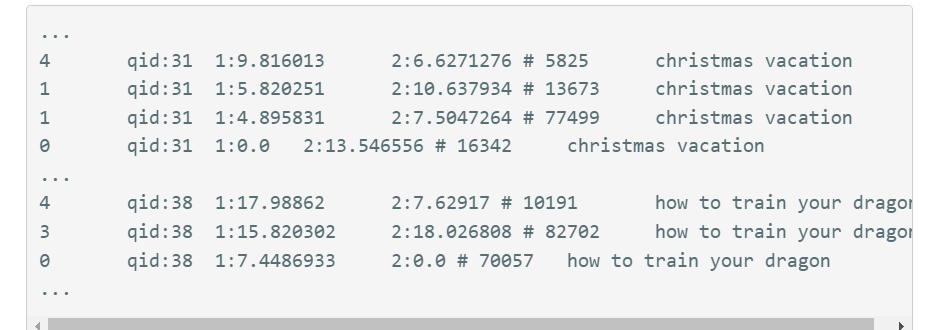

feature1 is the BM25 of the query in the movie title, and feature2 is the BM25 of the query in the movie overview/description

LambdaMART is essentially a gradient boosting algorithm (the MART piece, Multiple additive Regression Trees); which tries to predict Lambda which is a derived variable from the actual metric of interest (could be DCG, or precision, or anything else). This now becomes a classical point wise problem , because once we get the lambdas, we can actually treat each row as independent !!

So how is lambda obtained ?

Here's how

We start with the GT ranking and for a given query can compute the IDCG (ideal DCG)
Now , for a given query, we go through every document fetched; and swap it with every other document, and check the impact on DCG

(For example, let's say query1  has 4 document hits D1, D2, D3, D4 - You compute an IDCG.
Now, start with D1. Swap D1 with D2, D3, D4 one at a time, and compute the impact on DCG

The lambda for a given document is the sum of DCG differences obtained, whenenever that document is swapped


In pseudocode

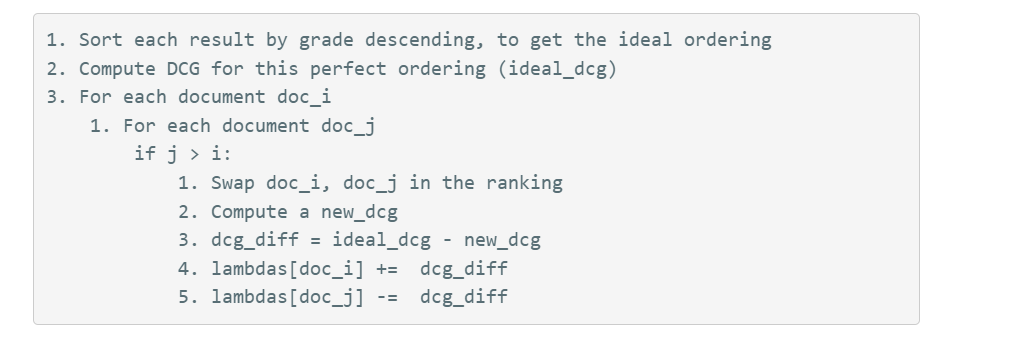

Here's the new matrix (training data ) you would get with lambda in it
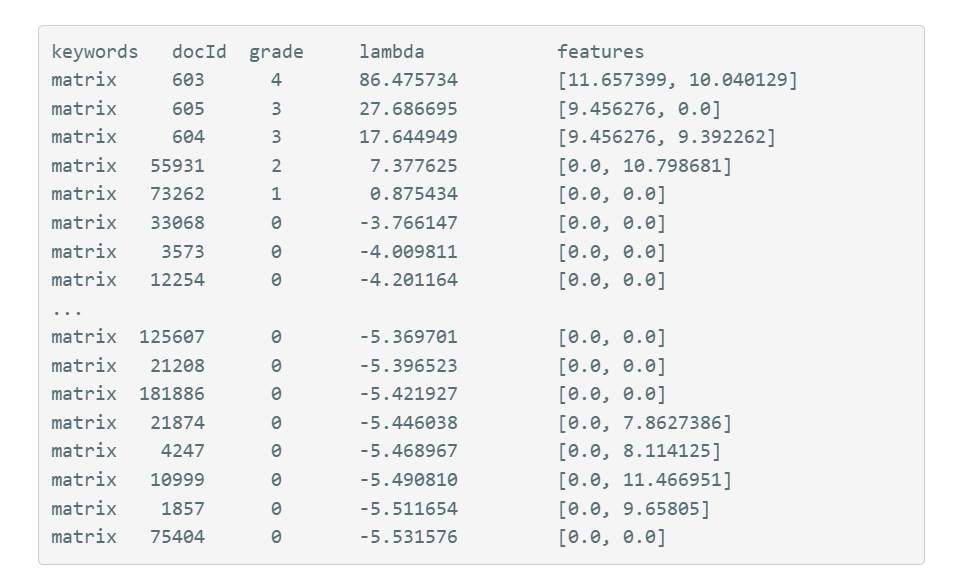


Here, matrix was the query. docID 603 corresponds to the first movie Matrix, docID 605 and 604 corresponds to the 2 sequels

These have the highest lambda scores because the impact of downranking these will be the highest on DCG.

Note that the same principle can be used for any metric. In this example, DCG was used, but in reality any metric can be used

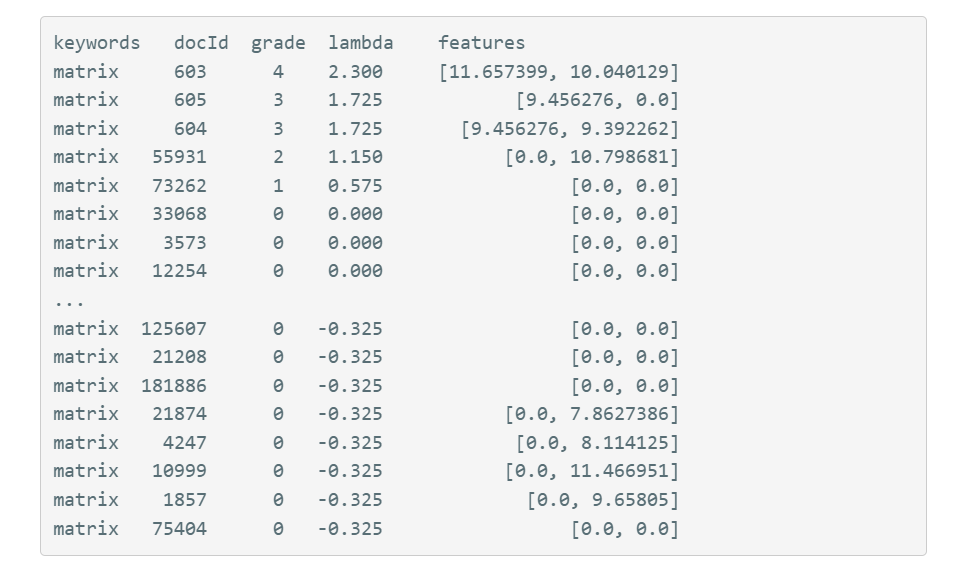

Once you have lambda, it boils down to a simple regression problem which you solve using gradient boosted trees

Now, given a new query, we can compute features, feed into this trained model, and predict lambda, higher the lambda, higher the rank

That's it !!

## References

1) https://softwaredoug.com/blog/2021/11/28/how-lammbamart-works

2) https://softwaredoug.com/blog/2022/01/17/lambdamart-in-depth.html#:~:text=Reviewing%20the%20LambdaMART%20algorithm&text=Last%20time%2C%20I%20described%20how,to%20a%20metric%20like%20DCG. - A couple of very nice articles on the intuition behind lambdamart